# THE SPARKS FOUNDATION 

# GRADUATE ROTATIONAL INTERNSHIP PROGRAM ( GRIP )

# Data Science & Business Analytics Intern

## Task 6 :

Prediction Using Decision Tree Algorithm

Create the Decision Tree Classifier and Visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

### Given Dataset :

(Iris.csv)[https://gist.github.com/netj/8836201]

## Author: Aishwarya Parulekar

### Step-1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Step-2: Loading the Dataset

In [2]:
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [3]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns

Index(['Petal length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'Species'],
      dtype='object')

In [5]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

### Step-3: Performing Exploratory Data Analysis

In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


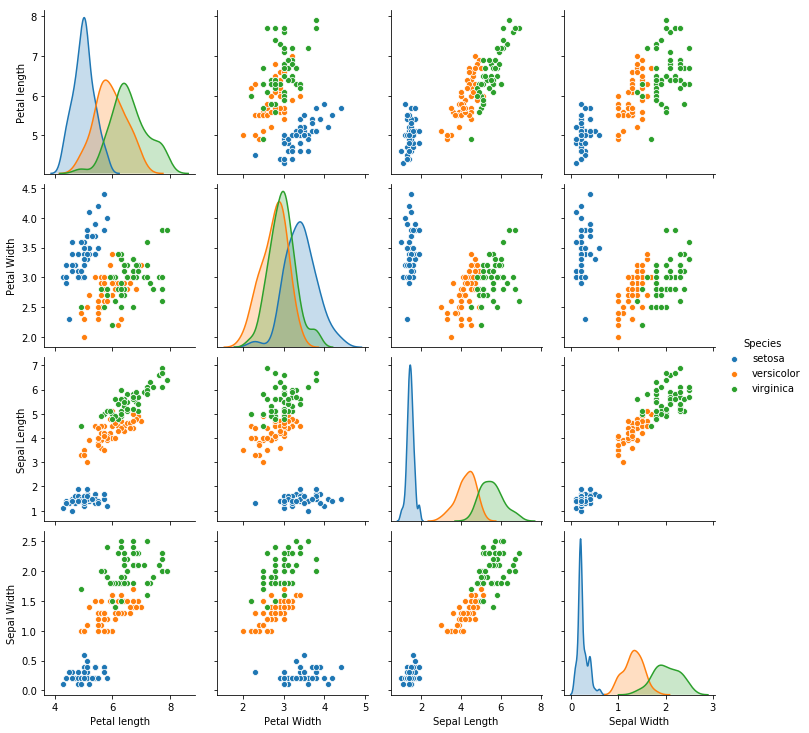

In [8]:
sns.pairplot(data, hue = 'Species')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [11]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64


### Step-4: Data Visualization

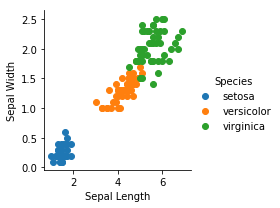

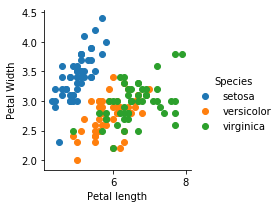

In [12]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

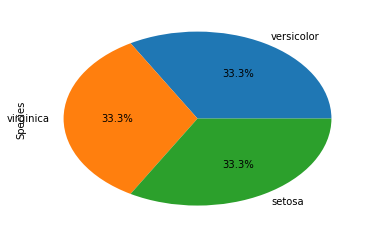

In [13]:
data['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Step-5: Finding the correlation matrix

In [14]:
data.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


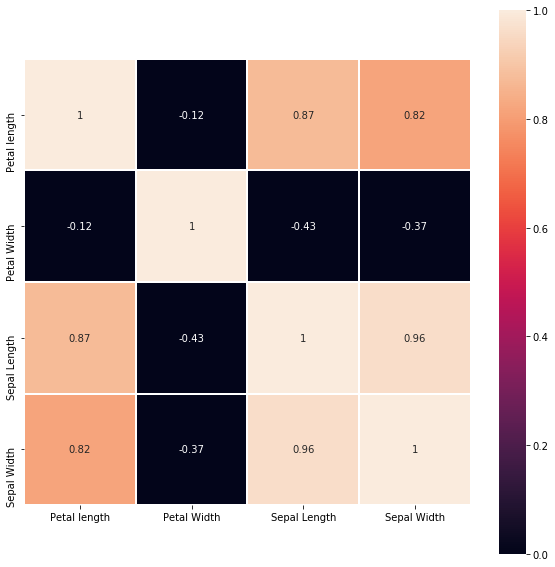

In [15]:
iris1 = data.corr() #finding correlation between variables of iris dataset

fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

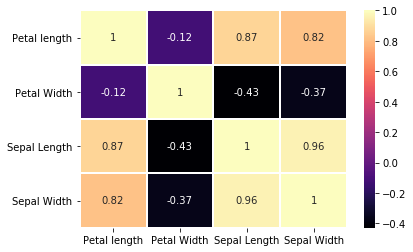

In [16]:
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap='magma')

### Step-6: Splitting our Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Step-7: Building a Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Step-8: Visualizing the Decision Tree

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

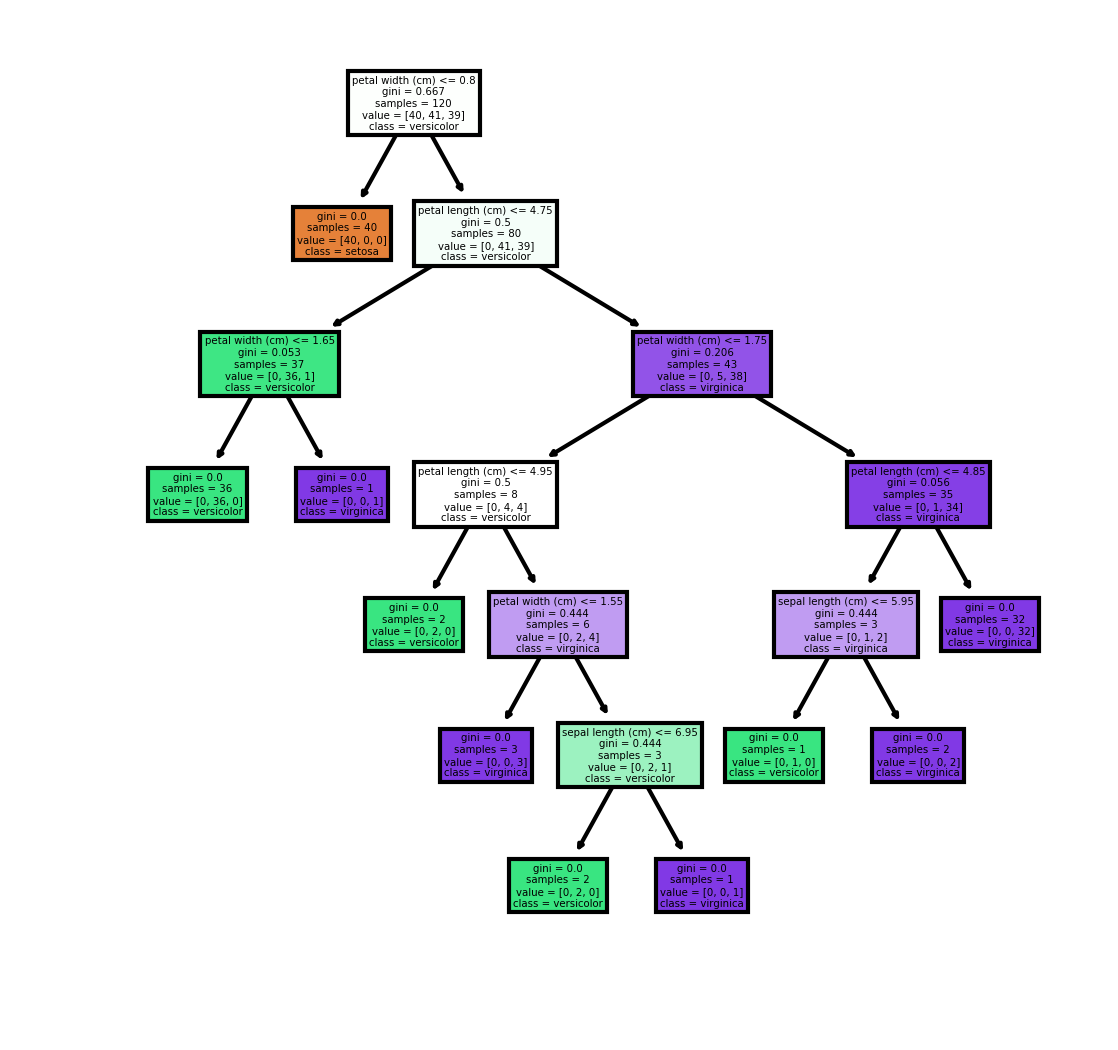

In [22]:
a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = a, class_names = b, filled = True);

### Step-9: Classification Report and Confusion Matrix

In [23]:
y_pred=model.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
import sklearn.metrics as sm
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 100.0%


### Step-10: Testing for new points except from Datasets

In [25]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(model.predict(Test_point))

[1 1 1 0 1 2]


The Decision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.

# Conclusion:

I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.

# Thank You